In [1]:
import os
import shutil
# Set the folder path to traverse
folder_path = './test'

# Set the txt file path to write the image name
txt_file_path = './file.txt'

# Set the destination folder path for copying pictures
destination_folder_path = './test_all'

# write the photoes' names to txt
with open(txt_file_path, 'w') as f:
    for root, dirs, files in os.walk(folder_path):
        for dir in dirs:
            for file in os.listdir(os.path.join(root, dir)):
                if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                    f.write(file + '\t'+ dir + '\n')
                    # Copy pictures to the destination folder
                    shutil.copy(os.path.join(root, dir, file), destination_folder_path)

In [2]:
import pandas as pd

df0 = pd.read_table('./Resnet/output/ResNet_test_data_res_0422.txt',sep = '\t',encoding = 'gbk',header = None)
df0.columns = ['file_name','score','suggest_type']

df1 = pd.read_table('./file.txt',sep = '\t',header = None,encoding = 'gbk')
df1.columns = ['file_name','label']

df = pd.merge(df0,df1,how = 'inner',on = ['file_name'])
print(df.shape)
df.head()

(7178, 4)


,file_name,score,suggest_type,label
0,PrivateTest_10072988.jpg,0.999582,surprise,surprise
1,PrivateTest_10077120.jpg,0.983974,happy,happy
2,PrivateTest_10086748.jpg,0.962322,neutral,neutral
3,PrivateTest_10089743.jpg,0.725769,fear,surprise
4,PrivateTest_10131363.jpg,0.991428,angry,angry


In [3]:
df['label'].value_counts()

happy       1774
sad         1247
neutral     1233
fear        1024
angry        958
surprise     831
disgust      111
Name: label, dtype: int64

In [5]:
# Mapping Fields
emotion2num = {'happy':'0','sad':'1','neutral':'2','fear':'3','angry':'4','surprise':'5','disgust':'6'}
df['label'] = df['label'].map(emotion2num)
df['suggest_type'] = df['suggest_type'].map(emotion2num)

In [6]:
# Calculation accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

label = df['label']
predict = df['suggest_type']
print('the accuracy is:',accuracy_score(label,predict))
print('the classification is:',classification_report(label,predict))

the accuracy is: 0.6960156032320981
the classification is:               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1774
           1       0.58      0.61      0.59      1247
           2       0.64      0.67      0.66      1233
           3       0.54      0.53      0.54      1024
           4       0.67      0.57      0.61       958
           5       0.77      0.84      0.81       831
           6       0.60      0.73      0.66       111

    accuracy                           0.70      7178
   macro avg       0.67      0.69      0.68      7178
weighted avg       0.70      0.70      0.70      7178



<Figure size 300x300 with 0 Axes>

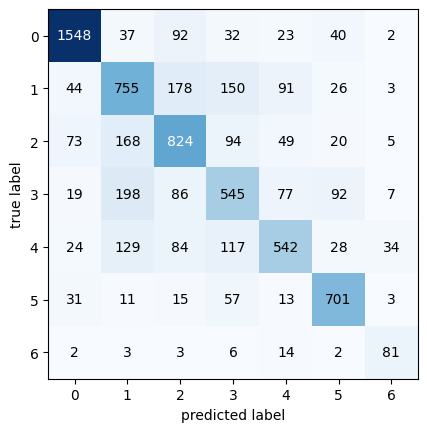

<Figure size 300x300 with 0 Axes>

In [7]:
#  confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

confusion_data = confusion_matrix(label,predict)
fig, ax = plot_confusion_matrix(confusion_data)
plt.figure(figsize=(3,3))